In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
from pydae.svg_tools import svg,grid2svg
from IPython.core.display import HTML,SVG
import pydae.grid_tools as gt

In [5]:
import cigre_eu_lv_acdc 
import cigre_eu_lv_acdc_tools as tools

In [22]:
import ipywidgets as widgets
grid = cigre_eu_lv_acdc.model()

K_dc = 5/100e3
params = {'p_vsc_R10':0e3,
          'p_vsc_C09':0e3}

case = 'Case 3'
excel_file = '../cigre_lv.xlsx'
tools.set_loads(excel_file,params, case)


sld_p_vsc = widgets.FloatSlider(orientation='horizontal',description = "p (kW)", 
                                value=0, min=-120,max= 120,step=5,continuous_update=False)
sld_q_vsc = widgets.FloatSlider(orientation='horizontal',description = "q (kvar)", 
                                value=0, min=-120,max= 120,step=5,continuous_update=False)


vsc_dict = {'VSC R01-S01':{'p':'p_vsc_R01','q':'q_vsc_R01'},
            'VSC R10-S10':{'p':'p_vsc_R10','q':'q_vsc_R10'},
            'VSC R14-S14':{'p':'p_vsc_R14','q':'q_vsc_R14'},
            'VSC I02-H02':{'p':'p_vsc_I02','q':'q_vsc_I02'},
            'VSC C01-D01':{'p':'p_vsc_C01','q':'q_vsc_C01'},
            'VSC C09-D09':{'p':'p_vsc_C09','q':'q_vsc_C09'},
            'VSC C11-D11':{'p':'p_vsc_C11','q':'q_vsc_C11'},
            'VSC C16-D16':{'p':'p_vsc_C16','q':'q_vsc_C16'},
            }        
        
sel_vsc = widgets.Select(
    options=[item for item in vsc_dict],
    value='VSC R10-S10',
    # rows=10,
    description='VSC:',
    disabled=False
)

text_post = widgets.Textarea(
    value='Hello \nWorld',
    placeholder='Type something',
    description='',
    disabled=False
)

#tools.set_v(grid,'MV0',20e3*1.025) 

#params.update(params_loads)
grid.ini(params,xy_0='xy_0_case2.json')


grid.fill_factor_ini = 100
grid.drop_tol_ini = 1e-10
grid.drop_rule_ini = 'basic'
grid.eval_preconditioner_ini()
grid.ltol_ini =1e-8

svg_1 = svg('./figs/case_1.svg')
svg_1.set_grid(grid,'cigre_eu_lv_acdc.json')
svg_1.V_min_pu = 0.95   
svg_1.V_max_pu = 1.05    
svg_1.post_data = {}

html_grid = widgets.HTML(svg_1.tostring())

def update(change):
    #options=['VSC R10-S10','VSC R14-S14','VSC I02-H02','VSC C16-D16','VSC C09-D09'],
    
    grid.set_value(vsc_dict[sel_vsc.value]['p'],1000*sld_p_vsc.value)
    grid.set_value(vsc_dict[sel_vsc.value]['q'],1000*sld_q_vsc.value)
    
    grid.spini({})
    #gt_grid = gt.grid(grid)
    #grid.report_u()

    svg_1.set_text('VSC_R01_S01_P',f"{grid.get_value('p_vsc_S01')/1000:2.0f} kW")
    svg_1.set_text('VSC_I01_H01_P',f"{grid.get_value('p_vsc_H01')/1000:2.0f} kW")
    svg_1.set_text('VSC_C01_D01_P',f"{grid.get_value('p_vsc_D01')/1000:2.0f} kW")

    svg_1.set_lines_currents()
    svg_1.set_buses_voltages()
    
    s_total = tools.get_head_power(grid)
    svg_1.set_text('MV0_P',f"{s_total.real/1000:2.0f} kW")
    #svg_1.set_tooltips('case_2_opt.svg')    

    
    post_text = f"V min/max {svg_1.post_data['v_ac_min']['bus']}: {svg_1.post_data['v_ac_min']['value']:0.2f}, "
    post_text+= f"{svg_1.post_data['v_ac_max']['bus']}: {svg_1.post_data['v_ac_max']['value']:0.2f}\n"
    post_text+= f"P = {s_total.real/1e3:0.1f} kW"
    
    
    text_post.value = post_text
    
    html_grid.value = svg_1.tostring()
    
    
def update_select(change):
    #options=['VSC R10-S10','VSC R14-S14','VSC I02-H02','VSC C16-D16','VSC C09-D09'],
    sld_p_vsc.value = grid.get_value(vsc_dict[sel_vsc.value]['p'])/1000
    sld_q_vsc.value = grid.get_value(vsc_dict[sel_vsc.value]['q'])/1000
    
    
update(0)

sld_p_vsc.observe(update, names='value')
sld_q_vsc.observe(update, names='value')

sel_vsc.observe(update_select, names='value')

layout_row1 = widgets.HBox([html_grid])
layout_row2 = widgets.HBox([sel_vsc,widgets.VBox([sld_p_vsc,sld_q_vsc]),text_post])
#layout_row3 = widgets.HBox([sld_q_vsc_R10])

layout = widgets.VBox([layout_row1,layout_row2])
layout

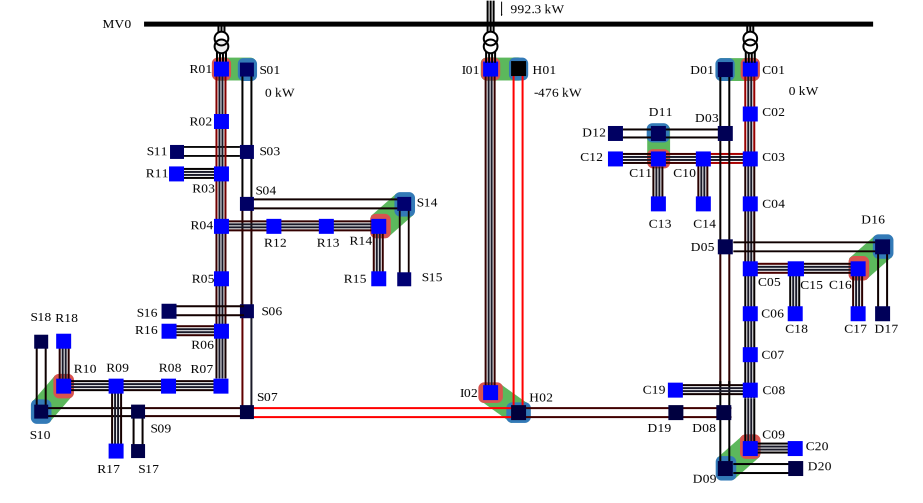

In [23]:
s = svg('./figs/cigre_eu_lv_acdc_v2.svg')
s.set_grid(grid,'cigre_eu_lv_acdc.json')
s.set_text('VSC_R01_S01_P',f"{grid.get_value('p_vsc_S01')/1000:2.0f} kW")
s.set_text('VSC_I01_H01_P',f"{grid.get_value('p_vsc_H01')/1000:2.0f} kW")
s.set_text('VSC_C01_D01_P',f"{grid.get_value('p_vsc_D01')/1000:2.0f} kW")
S_grid = tools.get_head_power(grid)
s.set_text('MV0_P',f"{S_grid.real/1000:5.1f} kW")
s.set_tooltips('case_2_opt.svg')    
SVG('case_2_opt.svg')